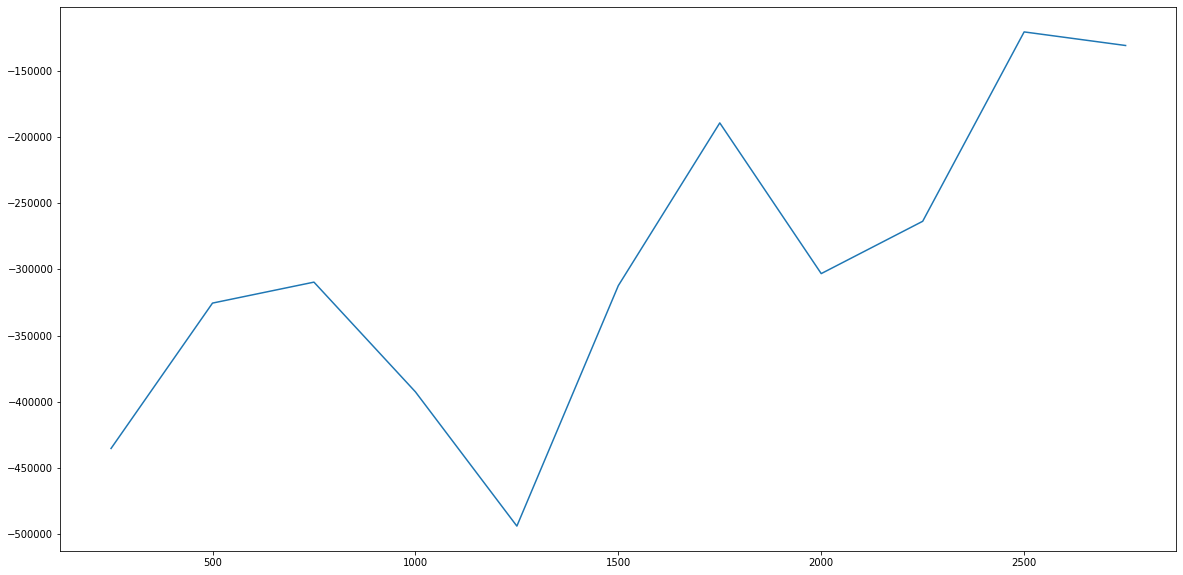

In [1]:
#CC show accumulate Earn money per ET
import pandas as pd
import os,re
import config as sc

system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try"
#system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E"
dnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC")
x=[int(re.findall(r'ET(\d+).csv',fn)[0]) for fn in os.listdir(dnwp) if "_" not in fn]
x.sort()
acc_earn=[]
for ET in x:
    fnwp=os.path.join(dnwp,"ET{0}.csv".format(ET))
    df=pd.read_csv(fnwp)
    df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))

    dfr=df[["StockS","Sell_Earn"]].groupby(["StockS"]).agg(totalEarn=pd.NamedAgg(column="Sell_Earn", aggfunc="sum"))
    acc_earn.append(dfr["totalEarn"].sum())

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(x,acc_earn)


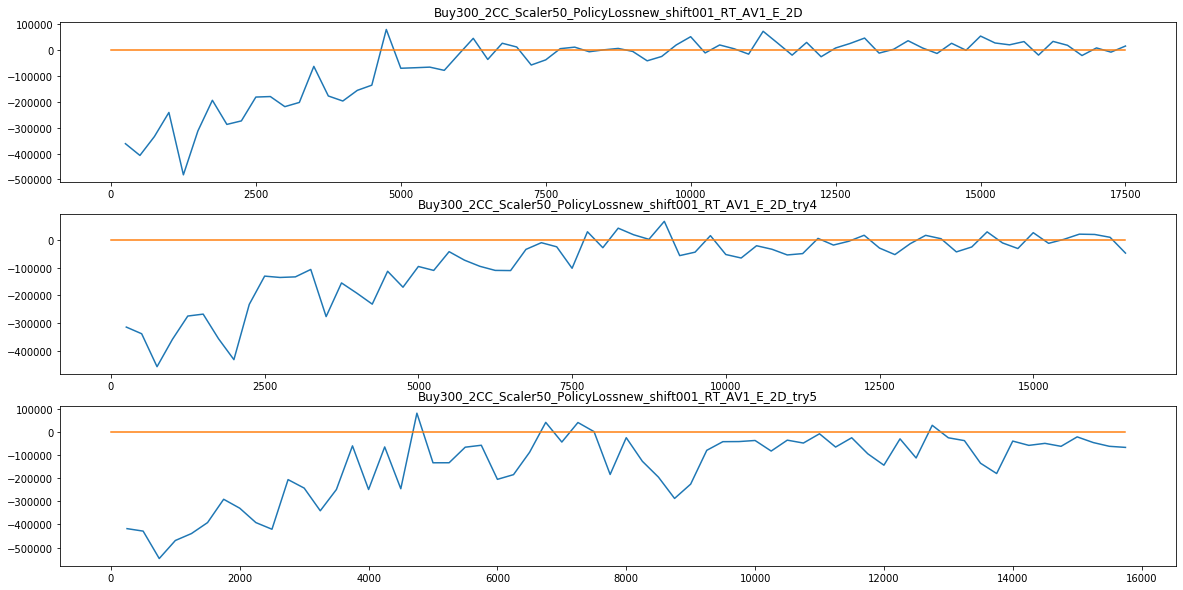

In [21]:
#CC show accumulate Earn money per ET
import pandas as pd
import os,re
import config as sc

system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D"
#system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E"
def get_acc_earn(system_name):
    dnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC")
    x=[int(re.findall(r'ET(\d+).csv',fn)[0]) for fn in os.listdir(dnwp) if "_" not in fn]
    x.sort()
    acc_earn=[]
    for ET in x:
        fnwp=os.path.join(dnwp,"ET{0}.csv".format(ET))
        df=pd.read_csv(fnwp)
        df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))

        dfr=df[["StockS","Sell_Earn"]].groupby(["StockS"]).agg(totalEarn=pd.NamedAgg(column="Sell_Earn", aggfunc="sum"))
        acc_earn.append(dfr["totalEarn"].sum())
    return x,acc_earn


system_names=["Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D",
              "Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try4",
         "Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try5"]
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
for idx, _ in enumerate(system_names):
    fig.add_subplot(len(system_names)*100+10+idx+1)

#fig.add_subplot(311)
#fig.add_subplot(312)
#fig.add_subplot(313)

allaxes = fig.get_axes()

for idx,system_name in enumerate(system_names):
    x,acc_earn=get_acc_earn(system_name)
    allaxes[idx].plot(x,acc_earn)
    allaxes[idx].set_title(system_name)
    allaxes[idx].plot([0,x[-1]],[0,0])
plt.show()


In [30]:
#CC list total earning per stock on a given ET
import os
import pandas as pd
import config as sc
import prettytable as pt
pd.options.display.float_format="{:,.2f}".format
#system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1"
system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D"
ET=11000
fnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC","ET{0}.csv".format(ET))
df=pd.read_csv(fnwp)
df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))
print (df.columns)
dfr=df[["StockS","Sell_Earn","AcutalAction"]].groupby(["StockS"]).agg(totalEarn=pd.NamedAgg(column="Sell_Earn", aggfunc="sum"),
                                                                     Sell_count=pd.NamedAgg("AcutalAction", lambda x: len([True for xi in x if xi==2])))
dfr["Stock"]=dfr.index
dfr.sort_values(by=["totalEarn"], inplace=True)
tb=pt.PrettyTable()
tb.field_names=dfr.columns
tb.float_format=".2"
for idx,row in dfr.iterrows():
    tb.add_row(row)
print (tb)
print (dfr["totalEarn"].sum())

Index(['TransIDI', 'Holding_Gu', 'Holding_Invest', 'Holding_HRatio',
       'Holding_NPrice', 'Buy_Times', 'Buy_Invest', 'Buy_NPrice',
       'Sell_Return', 'Sell_Earn', 'Sell_NPrice', 'DateI', 'StockI',
       'Eval_Profit', 'AcutalAction', 'StockS'],
      dtype='object')
+-----------+------------+----------+
| totalEarn | Sell_count |  Stock   |
+-----------+------------+----------+
|  -6393.91 |    1.00    | SH603993 |
|  -5171.06 |    1.00    | SH600741 |
|  -4988.88 |    1.00    | SH601229 |
|  -4871.50 |    2.00    | SZ002602 |
|  -4848.55 |    1.00    | SH600000 |
|  -4483.95 |    2.00    | SH600383 |
|  -4427.38 |    3.00    | SH600038 |
|  -4038.36 |    1.00    | SH600028 |
|  -3972.90 |    2.00    | SH601688 |
|  -3795.88 |    2.00    | SH603156 |
|  -3638.17 |    2.00    | SH600066 |
|  -3359.29 |    2.00    | SH601898 |
|  -2976.71 |    2.00    | SH603260 |
|  -2837.92 |    1.00    | SH601698 |
|  -2814.69 |    1.00    | SH601816 |
|  -2523.19 |    1.00    | SZ300124 |
|  

In [7]:
#CC list transaction record  on a given ET and stock
import os
import pandas as pd
import config as sc
import prettytable as pt
pd.options.display.float_format="{:,.2f}".format
system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D"
ET=500
Stock="SZ002236"
fnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC","ET{0}.csv".format(ET))
df=pd.read_csv(fnwp)
df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))

df=df[["AcutalAction","Holding_Invest","Buy_Invest","Sell_Earn","Sell_Return","StockS","TransIDI","DateI","Eval_Profit"]]
dfp=pd.pivot_table(df,index=["StockS","TransIDI","DateI"])
dfp.loc[Stock]


tb=pt.PrettyTable()
tb.field_names=dfp.columns
tb.float_format=".2"
for idx,row in dfp.loc[Stock].iterrows():
    tb.add_row(row)
print (tb)

+--------------+------------+-------------+----------------+-----------+-------------+
| AcutalAction | Buy_Invest | Eval_Profit | Holding_Invest | Sell_Earn | Sell_Return |
+--------------+------------+-------------+----------------+-----------+-------------+
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     nan      |    0.00    |     0.00    |

Index(['DateI', 'Money_in_hand', 'Eval_holding', 'Eval_Ttotal'], dtype='object')


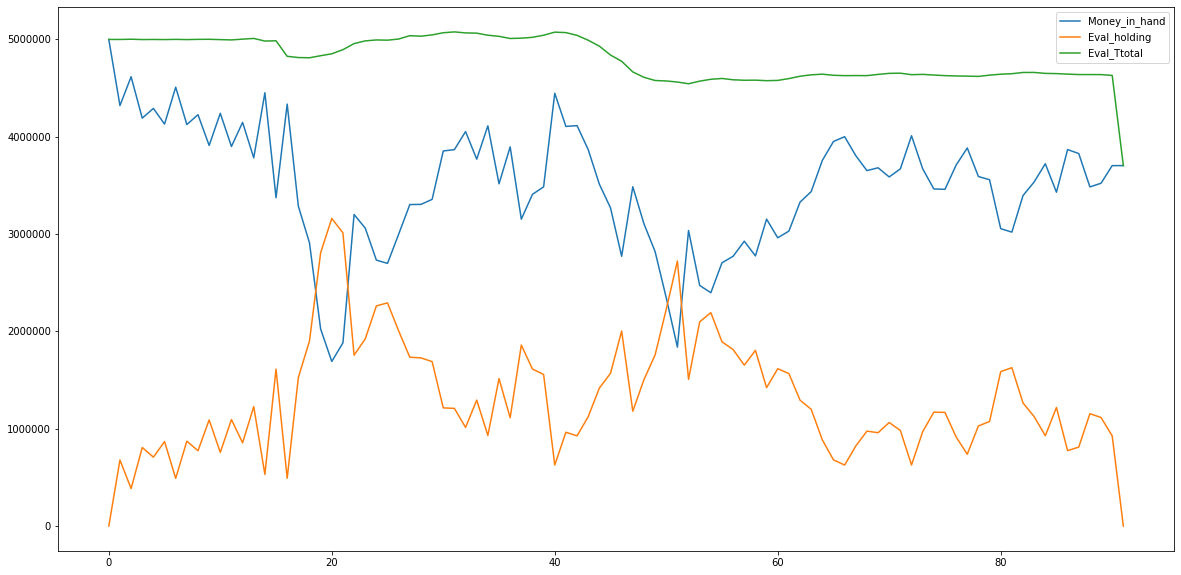

In [8]:
#plot eval value per day on given ET
#fnwp="sftp://homeserver/home/rdchujf/n_workspace/RL/Buy300_2C_CC_try/CC/ET250_money_in_hand.csv"
import os
import pandas as pd
import config as sc
pd.options.display.float_format="{:,.2f}".format
#system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1"
system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D"
ET=5000
fnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC","ET{0}_money_in_hand.csv".format(ET))
df=pd.read_csv(fnwp)
print (df.columns)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

for title in ["Money_in_hand","Eval_holding","Eval_Ttotal"]:
    plt.plot(df[title], label=title)
plt.legend()
    #plt.plot(df["Money_in_hand"],)
#plt.plot(df["Eval_holding"])
#plt.plot(df["Eval_Ttotal"])



In [ ]:
#analyse action
fnwp="/home/rdchujf/n_workspace/RL/Buy300_2C_CC_try/CC/ET1250_action_decision.csv"
df=pd.read_csv(fnwp)
df.columns
#['DateI', 'not_buy_due_sell', 'not_buy_due_limit','not_buy_due_low_profit', 'sell_due_low_profit']


print (len(df.loc[0,"not_buy_due_sell"].split("_")))
print (len(df.loc[0,"not_buy_due_limit"].split("_")))
#print (df.loc[0,"not_buy_due_low_profit"])
#print (len(df.loc[0,"sell_due_low_profit"].split("_")))
df.loc[0]